In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')
targets=np.load('targets.npy')

#loading the save numpy arrays in the previous code

In [2]:
target

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

In [4]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

train_data.shape,test_data.shape,train_target.shape,test_target.shape

((1238, 150, 150, 1), (138, 150, 150, 1), (1238, 2), (138, 2))

In [5]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

train_data.shape,test_data.shape,train_target.shape,test_target.shape

model = Sequential([
    
    #The first CNN layer followed by Relu and MaxPooling layers
    Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 1)),
    MaxPooling2D(2,2),
    
    #The second convolution layer followed by Relu and MaxPooling layers
    Conv2D(200, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(300, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    #Flatten layer to stack the output convolutions from second convolution layer
    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])
#The Final layer with two outputs for two categories

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [6]:
from keras.preprocessing.image import ImageDataGenerator

# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(train_data, train_target, batch_size=64)
# fit model
steps = int(train_data.shape[0] / 64)
history = model.fit_generator(it_train,steps_per_epoch=20,epochs=10,validation_data=(test_data,test_target),verbose=1)

Using TensorFlow backend.


Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 20 steps, validate on 138 samples
Epoch 1/10
20/20 [==============================] - 150s 7s/step - loss: 0.7378 - acc: 0.5299 - val_loss: 0.6490 - val_acc: 0.6812
Epoch 2/10
20/20 [==============================] - 175s 9s/step - loss: 0.6279 - acc: 0.6583 - val_loss: 0.5295 - val_acc: 0.7899
Epoch 3/10
20/20 [==============================] - 155s 8s/step - loss: 0.5035 - acc: 0.7617 - val_loss: 0.3342 - val_acc: 0.8478
Epoch 4/10
20/20 [==============================] - 160s 8s/step - loss: 0.3835 - acc: 0.8368 - val_loss: 0.2949 - val_acc: 0.8841
Epoch 5/10
20/20 [==============================] - 163s 8s/step - loss: 0.3094 - acc: 0.8780 - val_loss: 0.1785 - val_acc: 0.9565
Epoch 6/10
20/20 [==============================] - 165s 8s/step - loss: 0.2240 - acc: 0.9144 - val_loss: 0.1568 - val_acc: 0.9420
Epoch 7/10
20/20 [==============================] - 172s 9s/step - lo

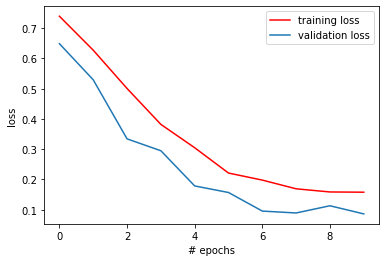

In [7]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

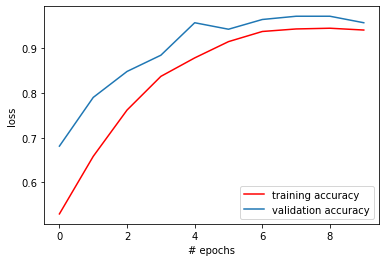

In [8]:
plt.plot(history.history['acc'],'r',label='training accuracy')
plt.plot(history.history['val_acc'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [9]:
print(model.evaluate(test_data,test_target))
model.save('model.h5')

138/138 [==============================] - 5s 33ms/sample - loss: 0.0859 - acc: 0.9565
[0.08594163204880728, 0.95652175]


In [10]:
predicted_classes = model.predict(test_data)

In [11]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [12]:
predicted_classes.shape, test_target.shape

((138,), (138, 2))

In [13]:
test_target

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.